## Coursework Part 2 - Dubai CW PG Thursday 6

Group Members 
* Aman
* Faizan
* Fardeen
* Pratibha
___

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the completete dataset

X = pd.read_csv('../../dataset/CompleteDataSet/x_train_all.csv')
y = pd.read_csv('../../dataset/CompleteDataSet/y_train_all.csv')

y1 = pd.read_csv('../../dataset/OnevrsAll/1_vrs_all/y_train_1.csv')
y2 = pd.read_csv('../../dataset/OnevrsAll/2_vrs_all/y_train_2.csv')

In [3]:
X1 = X.copy()
X2 = X.copy()

X1['class'] = y1
X2['class'] = y2

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

In [5]:
X1 = pd.DataFrame(X1).rename(columns={2304:'class'})
X2 = pd.DataFrame(X2).rename(columns={2304:'class'})

In [6]:
corr1 = X1.corr()
corr2 = X2.corr()

In [7]:
corr1 = pd.DataFrame(corr1['class'].abs().sort_values(ascending=False).index[1:11])
corr2 = pd.DataFrame(corr2['class'].abs().sort_values(ascending=False).index[1:11])


top10_features = pd.concat([corr1,corr2])
top10_features = top10_features[0].unique()
top10_features

array([1073, 1121, 1120, 1074, 1072, 1168, 1025, 1167, 1026, 1119, 1316,
       1030, 1317, 1268, 1269, 982, 1364, 1315, 1365, 1031], dtype=object)

In [8]:
top10_features = [str(col) for col in top10_features]

data = X[top10_features]
data

,1073,1121,1120,1074,1072,1168,1025,1167,1026,1119,1316,1030,1317,1268,1269,982,1364,1315,1365,1031
0,174.0,197.0,207.0,163.0,184.0,224.0,153.0,211.0,140.0,202.0,141.0,155.0,153.0,162.0,155.0,191.0,129.0,166.0,150.0,180.0
1,192.0,203.0,183.0,195.0,169.0,198.0,181.0,122.0,191.0,117.0,158.0,132.0,124.0,174.0,142.0,141.0,143.0,192.0,108.0,136.0
2,191.0,207.0,211.0,179.0,196.0,220.0,176.0,189.0,163.0,201.0,123.0,135.0,119.0,144.0,117.0,142.0,116.0,148.0,120.0,120.0
3,204.0,218.0,227.0,207.0,213.0,233.0,185.0,202.0,182.0,199.0,108.0,127.0,138.0,115.0,142.0,136.0,109.0,121.0,112.0,134.0
4,162.0,170.0,178.0,150.0,163.0,180.0,155.0,186.0,153.0,163.0,156.0,151.0,115.0,199.0,159.0,212.0,137.0,192.0,112.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,18.0,20.0,18.0,47.0,18.0,19.0,19.0,20.0,22.0,20.0,68.0,110.0,97.0,46.0,71.0,113.0,34.0,92.0,47.0,112.0
9686,18.0,33.0,18.0,78.0,17.0,19.0,18.0,18.0,36.0,18.0,57.0,107.0,71.0,46.0,87.0,107.0,34.0,78.0,64.0,107.0
9687,19.0,45.0,17.0,83.0,17.0,18.0,17.0,17.0,48.0,17.0,47.0,104.0,44.0,62.0,98.0,103.0,54.0,62.0,79.0,106.0
9688,16.0,31.0,16.0,77.0,16.0,16.0,15.0,16.0,39.0,16.0,33.0,99.0,33.0,44.0,92.0,97.0,48.0,72.0,82.0,100.0


In [11]:
data['class'] = y
data = data[(data['class'] == 1) | (data['class'] == 2)]
data

ValueError: cannot set a row with mismatched columns

In [13]:

X = data.iloc[:, :-1]
y = data['class']

In [14]:
X.shape

(4470, 20)

In [15]:
y.value_counts()

class
2    2250
1    2220
Name: count, dtype: int64

In [16]:
#normalising the data values so that all the values will be within 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([0.64754098, 0.65447154, 0.65306122, 0.65714286, 0.64081633,
       0.65163934, 0.64435146, 0.64853556, 0.64583333, 0.64016736,
       0.62809917, 0.51054852, 0.55371901, 0.55882353, 0.52066116,
       0.52916667, 0.61702128, 0.6440678 , 0.56790123, 0.57805907])

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K means Clustering')

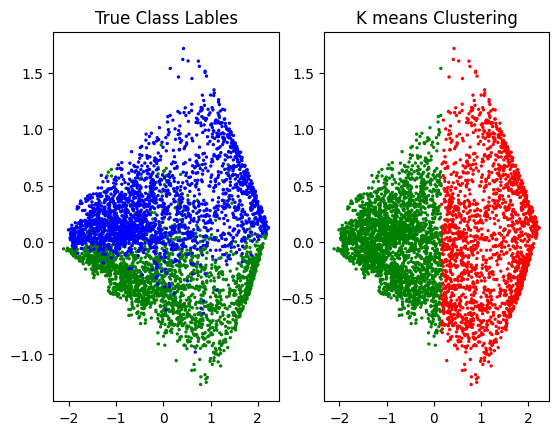

In [18]:
from sklearn.cluster import KMeans

colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1] ,c = colors[y], s=2)
plt.title("True Class Lables")


# Perform K-Means clustering and get cluster labels
kmeans = KMeans(n_clusters=2, random_state=0)
lables = kmeans.fit_predict(X_pca)

plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1] ,c = colors[lables], s=2)
plt.title("K means Clustering")

In [19]:
from sklearn.metrics import silhouette_score, homogeneity_score

inertia = kmeans.inertia_
silhouette = silhouette_score(X_pca, lables)
homogeneity = homogeneity_score(y, lables)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)
print("Homogeneity Score:", homogeneity)

Inertia: 2270.52442713039
Silhouette Score: 0.5295295051922546
Homogeneity Score: 0.003059816882816007


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score

# Define a range of K values
k_values = range(2, 11)  # You can adjust the range as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(X_pca)
    
    # Calculate the metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_pca, kmeans_labels)
    homogeneity = homogeneity_score(y, kmeans_labels)  # Use the actual labels for homogeneity
    
    print(f"K={k}, Inertia={inertia:.2f}, Silhouette Score={silhouette:.2f}, Homogeneity Score={homogeneity:.3f}")


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=2, Inertia=2270.52, Silhouette Score=0.53, Homogeneity Score=0.003


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=3, Inertia=1472.33, Silhouette Score=0.44, Homogeneity Score=0.016


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=4, Inertia=1153.62, Silhouette Score=0.39, Homogeneity Score=0.074


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=5, Inertia=873.32, Silhouette Score=0.40, Homogeneity Score=0.154


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=6, Inertia=728.52, Silhouette Score=0.38, Homogeneity Score=0.203


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=7, Inertia=606.22, Silhouette Score=0.38, Homogeneity Score=0.268


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=8, Inertia=528.57, Silhouette Score=0.38, Homogeneity Score=0.286


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=9, Inertia=470.52, Silhouette Score=0.38, Homogeneity Score=0.364


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=10, Inertia=416.02, Silhouette Score=0.38, Homogeneity Score=0.425


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

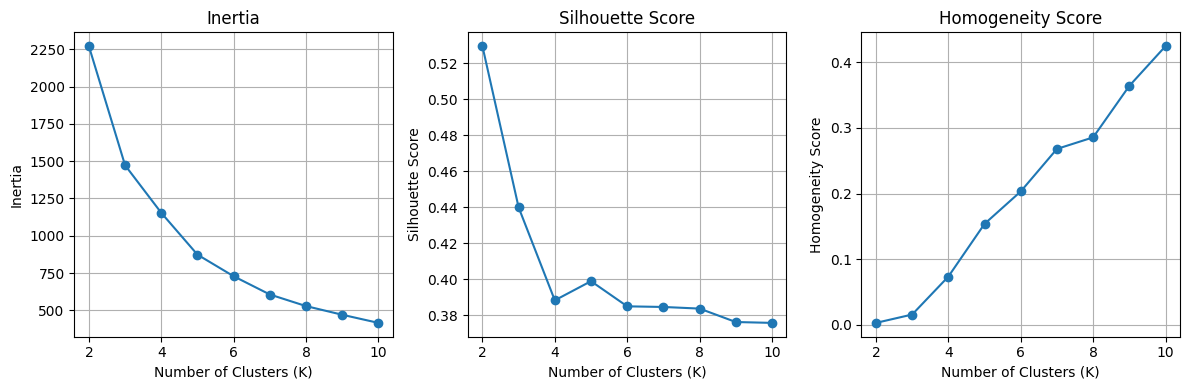

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
import matplotlib.pyplot as plt

# Define a range of K values
k_values = range(2, 11)  # You can adjust the range as needed

# Initialize empty lists to store the scores
inertia_values = []
silhouette_values = []
homogeneity_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(X_pca)
    
    # Calculate the metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_pca, kmeans_labels)
    homogeneity = homogeneity_score(y, kmeans_labels)  # Use the actual labels for homogeneity
    
    # Append the scores to the lists
    inertia_values.append(inertia)
    silhouette_values.append(silhouette)
    homogeneity_values.append(homogeneity)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.grid()
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.grid()
plt.plot(k_values, silhouette_values, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.grid()
plt.plot(k_values, homogeneity_values, marker='o', linestyle='-')
plt.title('Homogeneity Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Homogeneity Score')

plt.tight_layout()
plt.show()


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=2: 0.5295295051922546


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=3: 0.43989496381446924


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=4: 0.38833693437906214


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=5: 0.39893002086628776


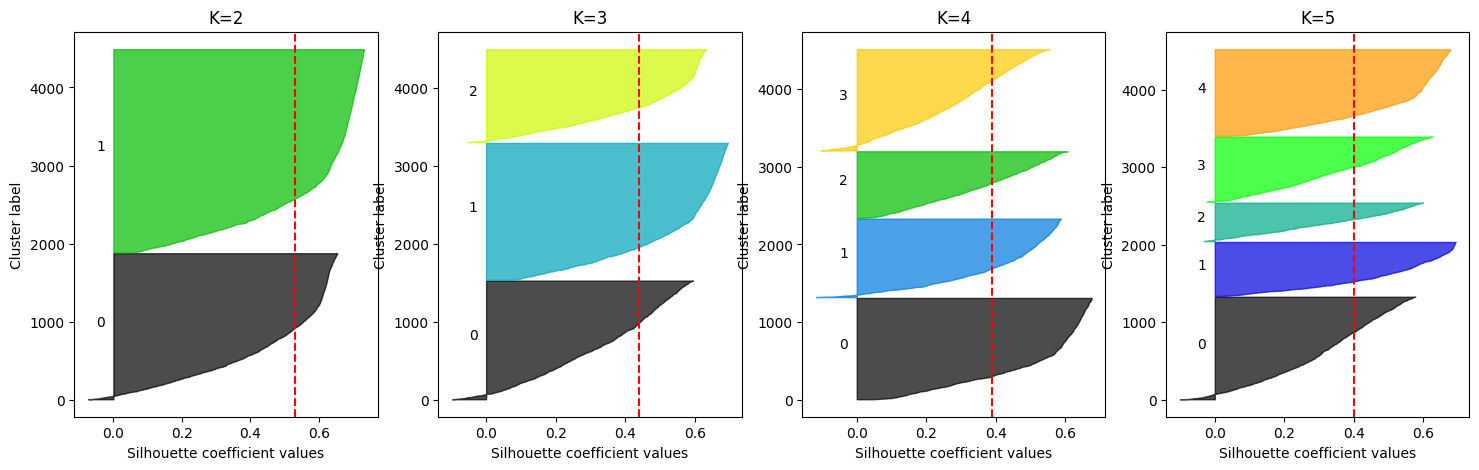

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define a range of K values
k_values = range(2, 6)  # Adjust the range as needed

# Create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(18, 5))

# Initialize variables to track the maximum silhouette score and the corresponding K value
max_silhouette_avg = -1
best_k = None

# Iterate over each K value and create silhouette plots
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X_pca)

    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    if silhouette_avg > max_silhouette_avg:
        max_silhouette_avg = silhouette_avg
        best_k = k

    print(f"Average silhouette score for K={k}: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for cluster in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(cluster) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(cluster))
        y_lower = y_upper + 10

    axs[i].set_title(f"K={k}")
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")

    # Add a dotted line for the average silhouette score
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

### Using EM and GMM

In [42]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score

# Define a range of n_components values
n_components_values = range(2, 11)  # You can adjust the range as needed

for n_components in n_components_values:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X_pca)  # Use your PCA-transformed data
    
    # Predict cluster labels
    gmm_labels = gmm.predict(X_pca)
    
    # Calculate the metrics
    silhouette = silhouette_score(X_pca, gmm_labels)
    homogeneity = homogeneity_score(y, gmm_labels)  # Use the actual labels for homogeneity
    
    print(f"n_components={n_components}, Silhouette Score={silhouette:.2f}, Homogeneity Score={homogeneity:.3f}")


n_components=2, Silhouette Score=0.52, Homogeneity Score=0.001
n_components=3, Silhouette Score=0.41, Homogeneity Score=0.020
n_components=4, Silhouette Score=0.36, Homogeneity Score=0.146
n_components=5, Silhouette Score=0.35, Homogeneity Score=0.196
n_components=6, Silhouette Score=0.33, Homogeneity Score=0.295
n_components=7, Silhouette Score=0.30, Homogeneity Score=0.379
n_components=8, Silhouette Score=0.23, Homogeneity Score=0.467
n_components=9, Silhouette Score=0.30, Homogeneity Score=0.474
n_components=10, Silhouette Score=0.30, Homogeneity Score=0.454


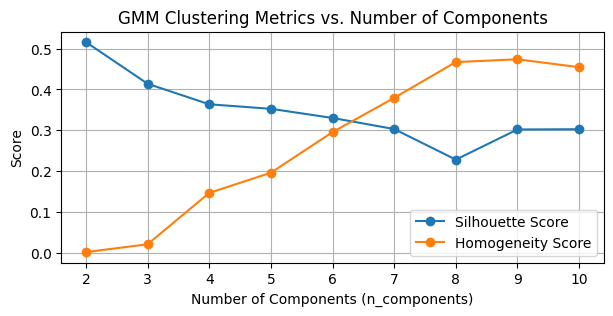

In [43]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score

# Define a range of n_components values
n_components_values = range(2, 11)  # You can adjust the range as needed

silhouette_scores = []
homogeneity_scores = []

for n_components in n_components_values:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X_pca)  # Use your PCA-transformed data
    
    # Predict cluster labels
    gmm_labels = gmm.predict(X_pca)
    
    # Calculate the metrics
    silhouette = silhouette_score(X_pca, gmm_labels)
    homogeneity = homogeneity_score(y, gmm_labels)  # Use the actual labels for homogeneity
    
    silhouette_scores.append(silhouette)
    homogeneity_scores.append(homogeneity)

# Plot the scores
plt.figure(figsize=(7, 3))
plt.plot(n_components_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(n_components_values, homogeneity_scores, marker='o', label='Homogeneity Score')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Score')
plt.title('GMM Clustering Metrics vs. Number of Components')
plt.xticks(n_components_values)
plt.legend()
plt.grid()
plt.show()


In [57]:
from sklearn.mixture import GaussianMixture

# Define the number of clusters (you can experiment with different values)
num_clusters = 2

# Initialize and fit the EM model to your data
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

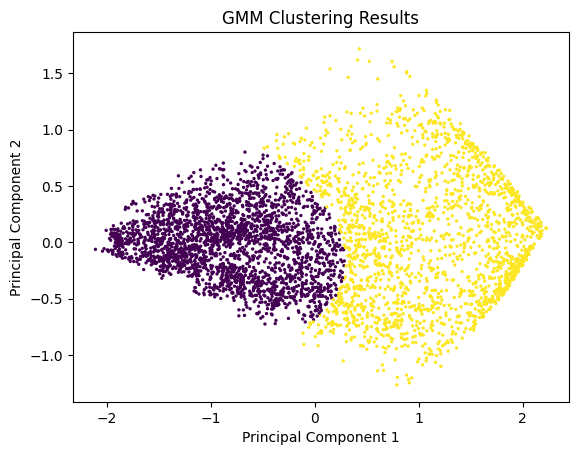

In [58]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=2)
plt.title("GMM Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [46]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, gmm_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5159391057321474


### Hierarchical Clustering

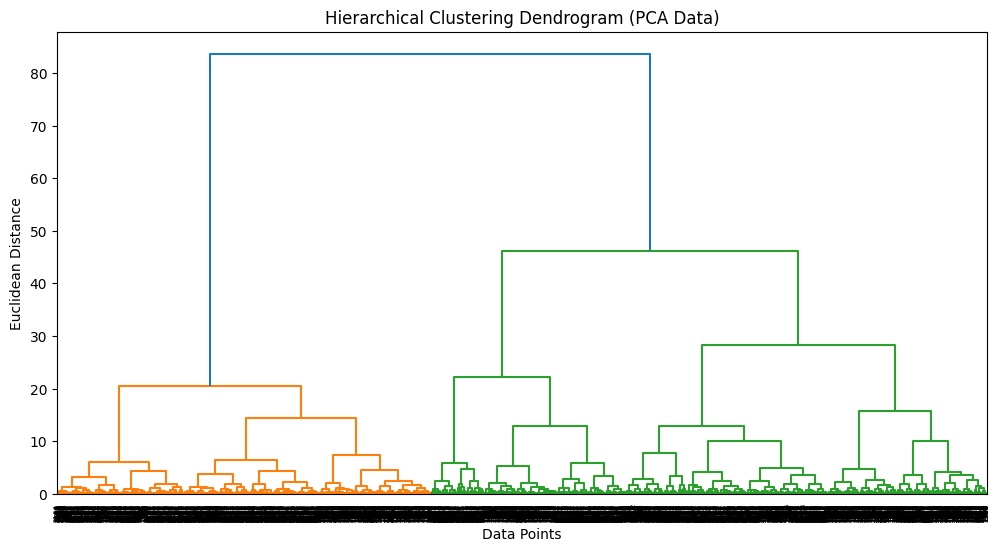

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure the data type is float64
X_pca = X_pca.astype(np.float64)

# Calculate the linkage matrix
Z = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (PCA Data)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


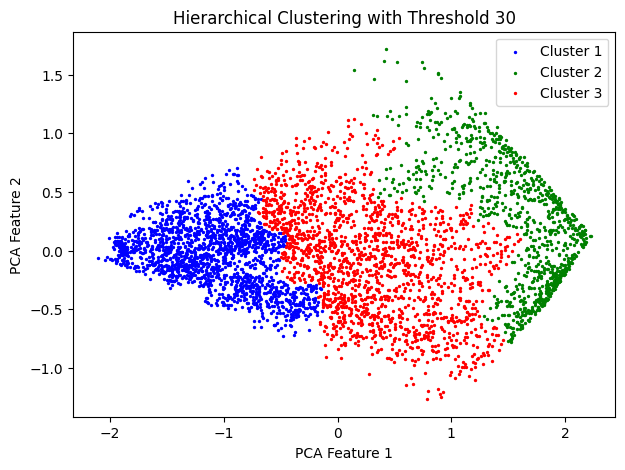

In [48]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Perform hierarchical clustering with the first two PCA components
Z = linkage(X_pca[:, :2], method='ward')

# Set the threshold to determine the number of clusters
threshold = 30  # Adjust this value based on your dendrogram

# Get cluster labels based on the threshold
clusters = fcluster(Z, t=threshold, criterion='distance')

# Create a DataFrame with PCA features and cluster labels
X_pca_with_clusters = pd.DataFrame(X_pca, columns=[f'PCA{i}' for i in range(1, X_pca.shape[1] + 1)])
X_pca_with_clusters['Cluster'] = clusters

# Visualize the clustered data
plt.figure(figsize=(7, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define colors for clusters
for cluster_id in np.unique(clusters):
    cluster_data = X_pca_with_clusters[X_pca_with_clusters['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], c=colors[cluster_id - 1], label=f'Cluster {cluster_id}', s=2)

plt.title(f'Hierarchical Clustering with Threshold {threshold}')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


### Using t-SNE to visualize the clusters

In [49]:
from sklearn.manifold import TSNE

# Initialize the t-SNE model and specify the number of components (e.g., 2 for 2D visualization)
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform your data
X_tsne = tsne.fit_transform(X_scaled)

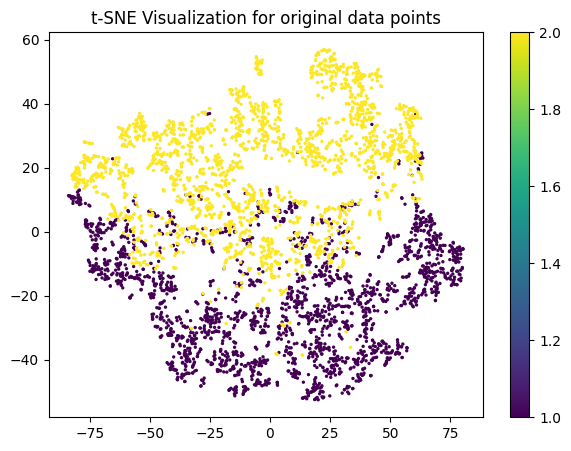

In [50]:
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=2)
plt.colorbar()
plt.title('t-SNE Visualization for original data points')
plt.show()

C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


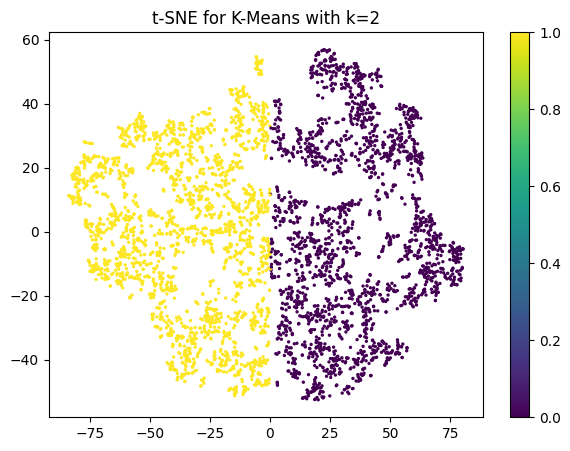

In [54]:
# Perform K-Means clustering and get cluster labels
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X_tsne)

# Visualize the data with t-SNE and color the data points by cluster labels
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=2)
plt.colorbar()
plt.title('t-SNE for K-Means with k=2')
plt.show()


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

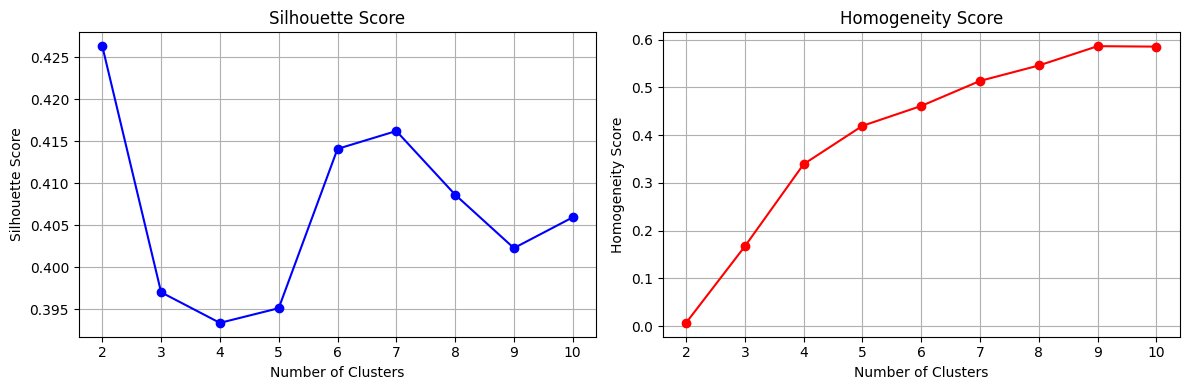

In [52]:
from sklearn.metrics import silhouette_score, homogeneity_score

silhouette_scores = []
homogeneity_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X_tsne)
    silhouette_avg = silhouette_score(X_tsne, labels)
    homogeneity_avg = homogeneity_score(y, labels)  # Use the actual labels for homogeneity
    silhouette_scores.append(silhouette_avg)
    homogeneity_scores.append(homogeneity_avg)

# Plot the Silhouette Score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()

# Plot the Homogeneity Score
plt.subplot(1, 2, 2)
plt.plot(k_values, homogeneity_scores, marker='o', linestyle='-', color='r')
plt.title('Homogeneity Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid()

plt.tight_layout()
plt.show()


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=2: 0.4263238310813904


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=3: 0.39713096618652344


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=4: 0.39337754249572754


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=5: 0.3951171934604645


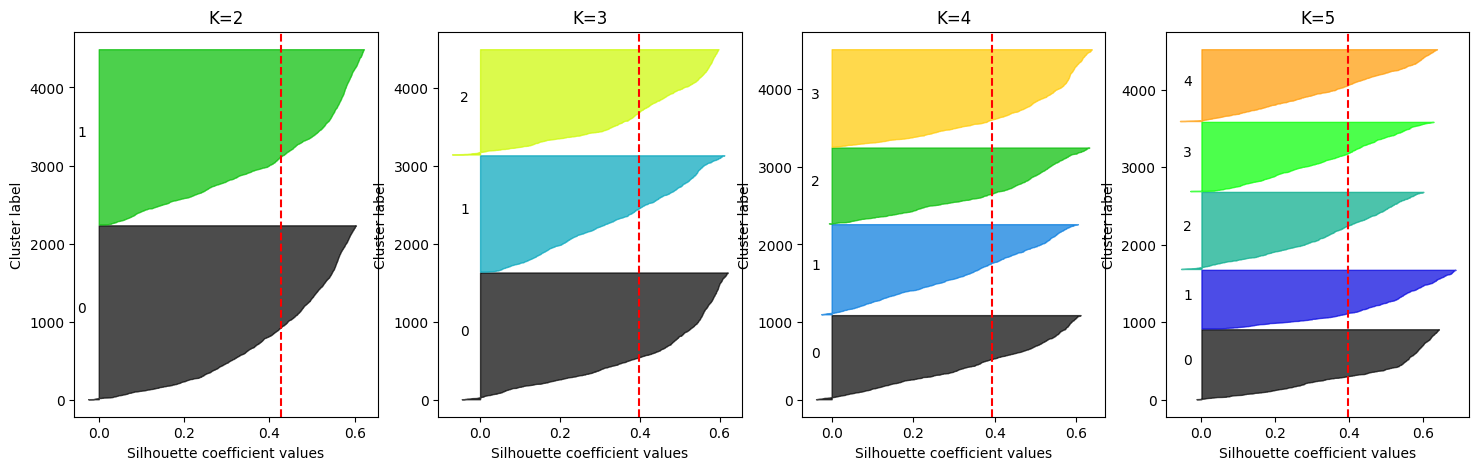

In [53]:
from sklearn.metrics import silhouette_samples

# Define a range of K values
k_values = range(2, 6)

# Create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(18, 5))

# Initialize variables to track the maximum silhouette score and the corresponding K value
max_silhouette_avg = -1
best_k = None

# Iterate over each K value and create silhouette plots
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X_tsne)

    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    if silhouette_avg > max_silhouette_avg:
        max_silhouette_avg = silhouette_avg
        best_k = k

    print(f"Average silhouette score for K={k}: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for cluster in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(cluster) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(cluster))
        y_lower = y_upper + 10

    axs[i].set_title(f"K={k}")
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")

    # Add a dotted line for the average silhouette score
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()